In [4]:
import pandas as pd
import numpy as np
import matplotlib

In [5]:
df = pd.read_csv(r"C:\Users\simbi\Ironhack\Proyecto\datos_proyecto\attacks.csv", encoding ="unicode_escape")

#df = pd.read_csv(r"C:\Users\nuc_humbertore\Ironhack\primer_proyecto_DAPT\datos_proyecto\attacks.csv", encoding ="unicode_escape")

# 1 Revisión inicial del DF

In [6]:
print(f"{df.shape = }")
print("\n")
print(f"{df.describe()}")
print("\n")
print(f"{df.info()}")

df.shape = (25723, 24)


              Year  original order
count  6300.000000     6309.000000
mean   1927.272381     3155.999683
std     281.116308     1821.396206
min       0.000000        2.000000
25%    1942.000000     1579.000000
50%    1977.000000     3156.000000
75%    2005.000000     4733.000000
max    2018.000000     6310.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name          

In [7]:
df.isnull().sum()

Case Number               17021
Date                      19421
Year                      19423
Type                      19425
Country                   19471
Area                      19876
Location                  19961
Activity                  19965
Name                      19631
Sex                       19986
Age                       22252
Injury                    19449
Fatal (Y/N)               19960
Time                      22775
Species                   22259
Investigator or Source    19438
pdf                       19421
href formula              19422
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Unnamed: 22               25722
Unnamed: 23               25721
dtype: int64

# Limpieza de los datos
## 2.2 filas

In [8]:
#Tomamos la columna "Case Number" como base 
#y eliminamos del DF todas las filas que tengan NaN en esta columna

#df.dropna(subset=["Case Number"], inplace=True)

df.dropna(how='all',inplace = True)

In [9]:
df.isnull().sum()

Case Number                  1
Date                      2401
Year                      2403
Type                      2405
Country                   2451
Area                      2856
Location                  2941
Activity                  2945
Name                      2611
Sex                       2966
Age                       5232
Injury                    2429
Fatal (Y/N)               2940
Time                      5755
Species                   5239
Investigator or Source    2418
pdf                       2401
href formula              2402
href                      2401
Case Number.1             2401
Case Number.2             2401
original order            2394
Unnamed: 22               8702
Unnamed: 23               8701
dtype: int64

In [10]:
df.tail(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
8701,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
print(f"{df.info()}")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8703 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null  

In [12]:
#Borramos las filas con valor 0 de Case Number

igual_a_0 = df[ df["Case Number"] == '0' ].index
# Eliminar estos índices de fila del dataFrame
df.drop(igual_a_0 , inplace=True)

In [13]:
print(f"{df.shape = }")
print("\n")
print(f"{df.info()}")

df.shape = (6303, 24)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6303 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6302 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species        

In [14]:
# para comprobar cuantos nulos hay por fila y listar los 10 que tienen más

nulos = df.isnull().sum(axis=1)
nulos.sort_values(ascending = False).head(10).index
nul = nulos.sort_values(ascending = False).head(10).index
list(nul)

[25722, 6165, 5036, 4976, 6122, 6130, 6108, 6080, 5246, 3033]

# pruebas

In [15]:
df.loc[list(nul)]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
25722,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6165,1638.00.00.R,Reported 1638,1638.0,Unprovoked,NaN,NaN,NaN,NaN,sailors,M,...,NaN,Sir Thomas Herbert,1638.00.00.R-Herbert,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1638.00.00.R,1638.00.00.R,138.0,NaN,NaN
5036,1930.09.12.R,1930,1930.0,Boating,AZORES,NaN,NaN,NaN,NaN,NaN,...,NaN,"C. Moore, GSAF",1930.09.12.R-Azores.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1930.09.12.R,1930.09.12.R,1267.0,NaN,NaN
4976,1932.11.09,08-Nov-1932,1932.0,Sea Disaster,CUBA,NaN,NaN,Hurricane & Tidal Wave,NaN,NaN,...,NaN,"Barrier Miner, 11/14/1932",1932.11.09-Hurricane-Cuba.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1932.11.09,1932.11.09,1327.0,NaN,NaN
6122,1808.06.01.R,Reported 01-May-1808,1808.0,Sea Disaster,ANTIGUA,NaN,Falmouth Harbour,NaN,NaN,NaN,...,NaN,"London Observer, 5/1/1808",1808.05.01.R-Antigua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1808.05.01.R,1808.06.01.R,181.0,NaN,NaN
6130,1802.04.13.R,Reported Apr-13-1802,1802.0,Unprovoked,INDIA,NaN,NaN,NaN,NaN,NaN,...,NaN,Evening Post (New York) 4/13/1802,1802.04.13.R-India.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1802.04.13.R,1802.04.13.R,173.0,NaN,NaN
6108,1823.12.30.R,Reported 30-Dec-1823,1823.0,Invalid,JAMAICA,NaN,NaN,NaN,male,NaN,...,Shark involvement prior to death unconfirmed,NaN,1823.12.30.R-Jamaica.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1823.12.30.R,1823.12.30.R,195.0,NaN,NaN
6080,1836.07.26.R,1836.07.26.R,1836.0,Invalid,SPAIN,NaN,NaN,NaN,NaN,NaN,...,Shark involvement prior to death unconfirmed,"C. Moore, GSAF",1836.07.26.R-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1836.07.26.R,1836.07.26.R,223.0,NaN,NaN
5246,1921.01.11.R,Reported 11-Jan-1921,1921.0,Invalid,PHILIPPINES,"Cavite Province, Luzon",NaN,NaN,NaN,NaN,...,Questionable,"Reno Evening Gazette, 1/11/1921",1921.01.11.R-Cavite.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1921.01.11.R,1921.01.11.R,1057.0,NaN,NaN
3033,1981.03.08,08-Mar-1981,1981.0,Sea Disaster,BERMUDA,NaN,NaN,Foundering of the Israeli freighter Mezada,NaN,NaN,...,NaN,"New York Times, 3/13/1981",1981.03.08-Mezada.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1981.03.08,1981.03.08,3270.0,NaN,NaN


In [16]:
#borramos los filas con menos de 10 valores que no son Null

df.dropna(thresh=10, inplace=True)

In [17]:
df.sample(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1209,2008.09.01,01-Sep-2008,2008.0,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,Joe McGauley,M,...,4' shark,J. McGauley,2008.09.01-McGauley.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2008.09.01,2008.09.01,5094.0,NaN,NaN
3824,1962.05.00.R,May 1962,1962.0,Boat,FIJI,Viti Levu,Near Suva,Fishing,17' fishing boat; occupants 2 men,NaN,...,NaN,"Yorkshire Evening News, 5/5/1962",1962.05.00-Suva-Fiji.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.05.00.R,1962.05.00.R,2479.0,NaN,NaN
3841,1962.01.26,26-Jan-1962,1962.0,Unprovoked,MOZAMBIQUE,Gaza,Praia Sepulveda,NaN,Domingos Zefanias Cumbe,M,...,NaN,D. Davies,1962.01.26-Cumbe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1962.01.26,1962.01.26,2462.0,NaN,NaN
5256,1920.01.24.R.b,Reported 24-Jan-1920,1920.0,Unprovoked,AUSTRALIA,Torres Strait,NaN,Diving,male,M,...,NaN,"The Argus, 1/24/1920",1920.01.24.R.b-TorresStrait-diver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1920.01.24.R.b,1920.01.24.R.b,1047.0,NaN,NaN
2473,1993.09.16.a,16-Sep-1993,1993.0,Unprovoked,EL SALVADOR,La Libertad,El Cocal Beach,Surfing,Mauricio Guzman Castaneda,M,...,NaN,"Tampa Tribune, 9/18/1993",1993.09.16.a-Castaneda.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1993.09.16.a,1993.09.16.a,3830.0,NaN,NaN


In [18]:
print(f"{df.shape = }")
print(df.info())

df.shape = (6302, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species           

In [19]:
#df.loc[(df['Area'] == "California")]#.value_counts().sum()
freq = df.groupby(["Area"].count("California"))

KeyError: 0

# Limpieza de los datos
## 2.2 Columnas

In [79]:
df.sample(2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
2093,1999.10.30.b,30-Oct-1999,1999.0,Unprovoked,USA,Florida,"Daytona Beach, Volusia County",Body boarding,Keven Dolsky,M,...,NaN,"S. Petersohn, GSAF",1999.10.30.b-Dolsky.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1999.10.30.b,1999.10.30.b,4210.0,NaN,NaN
5420,1909.06.18,18-Jun-1909,1909.0,Sea Disaster,AUSTRALIA,Queensland,"Middleton Reef, 300 nm from Brisbane","1446-ton Norwegian barque Errol, bound from Pe...",Master of the Errol,M,...,NaN,"Australian Zoologist, viii., 1937, p.207",1909.06.18-Errol.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1909.06.18,1909.06.18,883.0,NaN,NaN


In [80]:
diferencias_href = df.loc[(df['href'] != df['href formula'])]
diferencias_href

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
50,2018.01.13,13-Jan-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Martin Islet,Free diving,Callum Stewart,M,...,"White shark, 3.5 m","B. Myatt, GSAF",2018.01.13-Stewart.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.01.13,2018.01.13,6253.0,NaN,NaN
96,2017.08.29,29-Aug-2017,2017.0,Unprovoked,AUSTRALIA,Victoria,Cathedral Rock,Surfing,Marcel Brundler,M,...,"White shark, 3 m","B. Myatt, GSAF",2017.08.27-Brundler.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.29,2017.08.29,6207.0,NaN,NaN
131,2017.06.05,2017.06.05,2017.0,Unprovoked,FRENCH POLYNESIA,Marquesas,"Atuona Bay, Hiva Oa Island",Surfing,male,M,...,NaN,"Tahiti Infos, 6/6/2017",2017.06.05-FrenchPolynesia.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.05,2017.06.05,6172.0,NaN,NaN
133,2017.06.11,11-Jun-2017,2017.0,Unprovoked,AUSTRALIA,Western Australia,"Point Casuarina, Bunbury",Body boarding,Paul Goff,M,...,"White shark, 4 m","WA Today, 6/11/2017",2017.06.11-Goff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.06.11,2017.06.11,6170.0,NaN,NaN
141,2017.05.27,27-May-2017,2017.0,Invalid,AUSTRALIA,New South Wales,Evans Head,Fishing,Terry Selwood,M,...,NaN,"B. Myatt, GSAF",2017.05.27-Selwood.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.05.27,2017.05.27,6162.0,NaN,NaN
168,2017.03.19,19-Mar-2017,2017.0,Unprovoked,AUSTRALIA,New South Wales,The Farm,Body boarding,Gonzalo Fernandez,M,...,NaN,"Illawarra Mercury, 1/19/2017",2017.03.19-Fernandez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.03.19,2017.03.19,6135.0,NaN,NaN
234,2016.07.29,29-Jul-2016,2016.0,Unprovoked,SPAIN,Alicante Province,Arenales del Sol,Swimming,male,M,...,Blue shark,"Informacion.es, 7/29/2016",2016.07.29-Spain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.29,2016.07.29,6069.0,NaN,NaN
241,2016.07.23.a,23-Jul-2016,2016.0,Unprovoked,BAHAMAS,Abaco Islands,Green Turtle Cay,Spearfishing,Steve Cutbirth,M,...,"Bull shark, 6'","KWTX, 7/23/2016",2016.07.23.a-Cutbirth.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.07.23.a,2016.07.23.a,6062.0,NaN,NaN
276,2016.05.21.a,21-May-2016,2016.0,Unprovoked,USA,Florida,"Hugenot Beach , Jacksonville, Duval County",Swimming,female,F,...,NaN,"Action News Jax, 5/23/2016",2016.05.21.a-Girl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.05.21.a,2016.05.21.a,6027.0,NaN,NaN
324,2015.12.21.a,21-Dec-2015,2015.0,Unprovoked,BRAZIL,Pernambuco,Fernano de Noronha,Scuba diving,Márcio de Castro Palma,M,...,"Tiger shark, 1.5 m","Fox News, 12/22/2015",2015.12.21.a-Brazil.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2015.12.21.a,2015.12.21.a,5979.0,NaN,NaN


In [81]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [82]:
#Después de una exploración del df borramos las columnas
#con datos no numéricos y que no se pueden categorizar 
#P. ej.enlaces y códigos repetidos y columnas basura sin datos

In [83]:
df.drop(['pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2','Unnamed: 22','Unnamed: 23'], axis= 1, inplace=True)

In [84]:
print(df.columns)
df.shape

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'original order'],
      dtype='object')


(6302, 17)

In [22]:
df.head(3)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0


# 3 Dar formato a los datos

## Normalizar columna Age a int or float

In [92]:

df["Age_normalize"] = pd.to_numeric(df['Age'], errors='coerce', downcast="integer")

#df["Age_normalize"] = df.to_numeric(df['Age'])

#df["Age_normalize"] = df['Age'].astype('int32', errors = 'ignore')

#df["Age_normalize"]= df["Age_normalize"].astype('int64', errors = 'ignore')

In [97]:
#rellenamos los NaN con 0 -es un cambio temporal 

df["Age_normalize"].fillna(value=0 , inplace=True)

In [98]:
df["Age_normalize"] = df["Age_normalize"].astype(int)

In [100]:
df["Age_normalize"].dtypes

dtype('int32')

In [101]:
df["Age_normalize"].values

array([57, 11, 48, ...,  0,  0, 15])

In [28]:
# ¿Cuantos datos se pierden en la conversión de "Age" a "Age_normalize"?

datos_age_perdidos = df["Age_normalize"].isna().sum() - df["Age"].isna().sum()
datos_age_perdidos

102

In [29]:
media_age = df["Age_normalize"].mean()
media_age

27.36835856337192

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [31]:
df.head(4)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Age_normalize
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",6303.0,57.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",6302.0,11.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",6301.0,48.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",6300.0,NaN


In [20]:
# list(df["Species "].unique())

In [33]:
df["Age"].unique()

array(['57', '11', '48', nan, '18', '52', '15', '12', '32', '10', '21',
       '34', '30', '60', '33', '29', '54', '41', '37', '56', '19', '25',
       '69', '38', '55', '35', '46', '45', '14', '40s', '28', '20', '24',
       '26', '49', '22', '7', '31', '17', '40', '13', '42', '3', '8',
       '50', '16', '82', '73', '20s', '68', '51', '39', '58', 'Teen',
       '47', '61', '65', '36', '66', '43', '60s', '9', '72', '59', '6',
       '27', '64', '23', '71', '44', '62', '63', '70', '18 months', '53',
       '30s', '50s', 'teen', '77', '74', '28 & 26', '5', '86', '18 or 20',
       '12 or 13', '46 & 34', '28, 23 & 30', 'Teens', '36 & 26',
       '8 or 10', '84', '\xa0 ', ' ', '30 or 36', '6½', '21 & ?', '75',
       '33 or 37', 'mid-30s', '23 & 20', ' 30', '7      &    31', ' 28',
       '20?', "60's", '32 & 30', '16 to 18', '87', '67', 'Elderly',
       'mid-20s', 'Ca. 33', '74 ', '45 ', '21 or 26', '20 ', '>50',
       '18 to 22', 'adult', '9 & 12', '? & 19', '9 months', '25 to 35',
  

In [104]:
# list(df["Injury"].unique())

In [35]:
# list(df["Species "].unique())

In [109]:
list(df["Type"].unique())

['Boating',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 nan,
 'Boat',
 'Boatomg']

In [36]:
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
original order            float64
Age_normalize             float64
dtype: object

In [37]:
df.Age_normalize.nunique()

80

<AxesSubplot:>

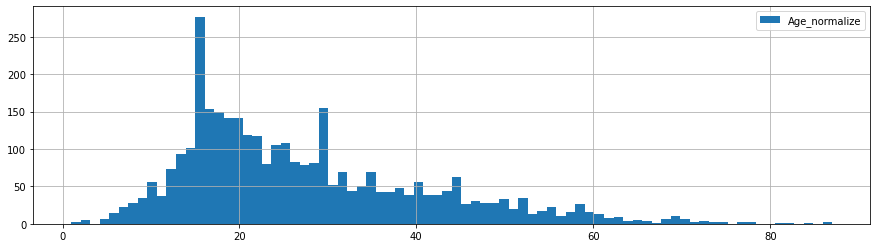

In [38]:
df.Age_normalize.hist(legend=True,bins= 80, figsize = [15,4])

## Normalizar columna Date a datetime

In [39]:
df['Datetime'] = pd.to_datetime(df['Date'], errors ='coerce')

In [40]:
df['Datetime'].count()

5458

In [41]:
df['Datetime'].nunique()

4605

In [42]:
df['Datetime'].isnull().sum()

844

In [43]:
df['Datetime'].fillna(value=0, inplace = True)

In [44]:
df['Datetime'].isnull().sum()

0

In [45]:
df['Date'].nunique()

5433

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6301 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null   

In [47]:
df[["Year","Datetime"]].sample(10)

,Year,Datetime
2086,1999.0,1999-11-30 00:00:00
5760,1886.0,1886-01-28 00:00:00
2212,1997.0,1997-12-25 00:00:00
2268,1996.0,1996-12-10 00:00:00
5144,1926.0,0
2125,1999.0,1999-04-22 00:00:00
4515,1949.0,1949-04-17 00:00:00
3690,1964.0,1964-03-05 00:00:00
3971,1960.0,1960-08-22 00:00:00
2957,1983.0,1983-01-01 00:00:00


In [63]:
df.iloc[2888]["Datetime"].year

7

In [49]:
df.count()

Case Number               6301
Date                      6302
Year                      6300
Type                      6298
Country                   6252
Area                      5847
Location                  5762
Activity                  5758
Name                      6092
Sex                       5737
Age                       3471
Injury                    6274
Fatal (Y/N)               5763
Time                      2948
Species                   3464
Investigator or Source    6285
original order            6302
Age_normalize             3369
Datetime                  6302
dtype: int64

In [50]:
df.dtypes

Case Number                object
Date                       object
Year                      float64
Type                       object
Country                    object
Area                       object
Location                   object
Activity                   object
Name                       object
Sex                        object
Age                        object
Injury                     object
Fatal (Y/N)                object
Time                       object
Species                    object
Investigator or Source     object
original order            float64
Age_normalize             float64
Datetime                   object
dtype: object

In [51]:
df.isnull().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
original order               0
Age_normalize             2933
Datetime                     0
dtype: int64

In [52]:
def year_to_int(x):
    try:
        z = str(x).split(".")
        return (int(z[0]))
    except:
        pass
        

In [53]:
df["borr"] = df.Year.apply(year_to_int)

def feet2cm(x):
    (f,i) = x.split('-')
    return 30.48 * int(f) + 2.54 * int(i)

nba['altura_cm'] = nba.Height.apply(feet2cm)

In [54]:
df['año'] = pd.to_datetime(df["borr"],format="%Y", errors ='coerce')

In [55]:
df['año'].dtypes

dtype('<M8[ns]')

In [56]:
# df['año'].isnull().sum()

In [57]:
df["borr"].isnull().sum()
df["año"].isnull().sum()

140

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6302 entries, 0 to 6301
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Case Number             6301 non-null   object        
 1   Date                    6302 non-null   object        
 2   Year                    6300 non-null   float64       
 3   Type                    6298 non-null   object        
 4   Country                 6252 non-null   object        
 5   Area                    5847 non-null   object        
 6   Location                5762 non-null   object        
 7   Activity                5758 non-null   object        
 8   Name                    6092 non-null   object        
 9   Sex                     5737 non-null   object        
 10  Age                     3471 non-null   object        
 11  Injury                  6274 non-null   object        
 12  Fatal (Y/N)             5763 non-null   object  

<AxesSubplot:>

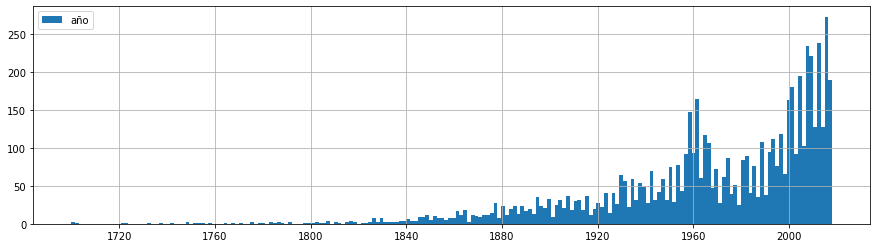

In [59]:
df["año"].hist(legend=True,bins= 200, figsize = [15,4])

In [60]:
df.isnull().sum()

Case Number                  1
Date                         0
Year                         2
Type                         4
Country                     50
Area                       455
Location                   540
Activity                   544
Name                       210
Sex                        565
Age                       2831
Injury                      28
Fatal (Y/N)                539
Time                      3354
Species                   2838
Investigator or Source      17
original order               0
Age_normalize             2933
Datetime                     0
borr                         2
año                        140
dtype: int64

In [61]:
df["año"].fillna(value=2000, inplace = True)

In [62]:
df[df["Datetime"]==2000]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Injury,Fatal (Y/N),Time,Species,Investigator or Source,original order,Age_normalize,Datetime,borr,año
